In [142]:
import numpy as np

# ETKF
#
# Single observation
# No observation operator

# Ensemble size
K = 1000

# Background
mean = 0.0
sigma = 1.0
X = np.random.normal( mean, sigma, K).reshape((1, K))
X -= np.mean(X) + mean
X = X / np.std(X, ddof=1)*sigma

# Obs
obs = 2.0
oerr = 1.0
R = np.square(oerr)

#print(X.shape, R.shape)
#print(R)

In [171]:
# Gamma Background
shape, scale = 2., 2.
gamma = np.random.gamma(shape, scale, K)
gamma -= np.mean( gamma) + mean
gamma = gamma / np.std(gamma,ddof=1) * sigma


In [172]:
def ETKF( X ):
    # O-B
    omb = (obs - np.mean(X) ).reshape((1, 1)) 

    Xe = X - np.mean(X)


    # Kalman gain
    # (L)ETKF
    work = np.identity( K ) * (K-1) + Xe.T @ Xe / R

    from numpy import linalg as LA
    eig, V = LA.eigh(work)

    P_ah = V @ np.diag(1.0 / eig) @ V.T
    P_ah2 = V @ np.diag(1.0 / np.sqrt(eig)) @ V.T

    #print(Xe.shape, P_ah.shape)

    w1d = (P_ah @ Xe.T / R*omb).reshape((K,1)) 

    W = np.sqrt(K - 1) * P_ah2 + w1d

    Xa = np.mean(X) + Xe  @ W 

    #print(Xa.shape)
    #print( np.mean(Xa), np.mean(X), obs, omb)
    return(Xa)

Analysis spread: 0.71 (Gaussian), 1.00 (Gamma)


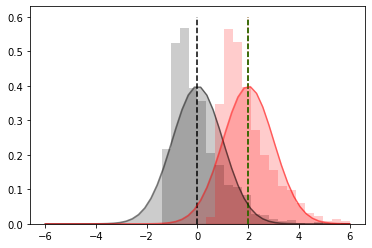

In [176]:
# plot

#guess = X
#guess = gamma
Xa_gaus = ETKF( X)
Xa_gamma = ETKF( gamma)

Xa = Xa_gamma

xmin = -6
xmax = 6

c_l = ["k", "r"]

data_l = [guess, Xa, ]

import matplotlib.pyplot as plt
import scipy.stats as stats

# Obs Gaussian
sigma_ = oerr
mean_ = obs
x_ = np.linspace(xmin, xmax )
#plt.plot(x_, stats.norm.pdf(x_, mean_, sigma_), color='b', alpha=0.5)
#plt.fill_between(x_, stats.norm.pdf(x_, mean_, sigma_), 
#                 color='b', alpha=0.2)


for i, data in enumerate( data_l ):
    data = np.ravel( data )
    h = 3.5 * np.std(data, ddof=1) / np.power(K, 0.333)
    nbin = int( (xmax - xmin) / h)

#    '''
    y, x, _ = plt.hist( data, density=True, color=c_l[i], 
                       range=(xmin, xmax), bins=nbin, alpha=0.2,
                      rwidth=1.0)
    plt.vlines( x = np.mean(data), ymin=y.min(), ymax=0.6,
              color=c_l[i], ls='dashed')
#    '''
    # Gaussian
    sigma_ = np.std(data, ddof=1)
    mean_ = np.mean(data)
    x_ = np.linspace(xmin, xmax )
    plt.plot(x_, stats.norm.pdf(x_, mean_, sigma_), color=c_l[i], alpha=0.5 )
    plt.fill_between(x_, stats.norm.pdf(x_, mean_, sigma_), 
                     color=c_l[i], alpha=0.2 )

# Analysis mean from a Gaussian guess
_ = plt.vlines( x = np.mean(Xa), ymin=y.min(), ymax=0.6,
              color='g', ls='dashed')
print("Analysis spread: {0:.2f} (Gaussian), {1:.2f} (Gamma)".format( np.std(Xa_gaus, ddof=1),
                                                  np.std(Xa_gamma, ddof=1)))
#plt.set_ylim(0, 0.6)
#_ = plt.vlines( x = obs, ymin=y.min(), ymax=y.max(),
#              color="b", ls='dashed')